# 多分类指标

多分类问题的所有指标基本上都来自于二分类指标，但是要对所有类别进行平均。多分类的精度被定义为正确分类的样本所占的比例。同样，如果类别是不平衡的，精度并不是很好的评估度量。想象一个三分类问题，其中85%的数据点属于类别A。 10%属干类别B，5%属干类别C。在这个数据集上85%的精度说明了什么?一般来说，多分类结果比二分类结果更加难以理解，除了精度，常用的工具有混淆矩阵和分类报告,我们在二分类的例子中都见过。

将这两种详细的评估方法应用于对digits数据集中10种不同的手写数字进行分类的任务：

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuary: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix: \n {}".format(confusion_matrix(y_test, pred)))

Accuary: 0.951
Confusion matrix: 
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


D:\python\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


模型的精度为95.3%,这表示我们已经做得相当好了。混淆矩阵为我们提供了更多细节。与二分类的情况相同，每一行对应于真实标签，每一列对应于预测标签。下图给出了一张视觉上更加吸引人的图像:

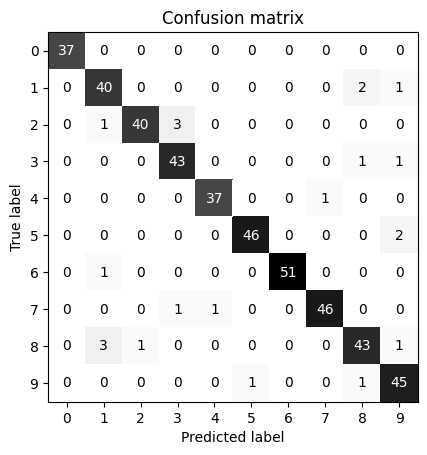

In [7]:
# 10个数字分类任务的混淆矩阵
import mglearn
import matplotlib.pyplot as plt
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel='Predicted label', ylabel='True label', 
                                    xticklabels=digits.target_names, yticklabels=digits.target_names,  cmap=plt.cm.gray_r,fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()
# gca 代表 "get current axis"，它获取当前图表的坐标轴。
# invert_yaxis()：这是一个方法，用于反转 y 轴的方向。当调用这个方法时，y 轴上的值从上到下的方向将被反转，即最大值在顶部，最小值在底部。
# plt.gca().invert_yaxis() 的作用是在 Matplotlib 中反转当前图表的 y 轴方向，使得图形的顶部变成 y 轴的最小值，底部变成 y 轴的最大值。

对于第一个类别（数字0）, 它包含37个样本，所有这些样本都被划为类别0 （即类别0，没有假反例）。我们之所以可以看出这一点，是因为混淆矩阵第一行中其他所有元素都为0。我们还可以看到，没有其他数字被误分类为类别0，这是因为混淆矩阵第一列中其他所有元素都为0（即类别0 没有假正例）。但是有些数字与其他数字混在一起比如数字2（第3 行），其中有3个被划分到数字3 中（第4列），还有一个数字1被划分到数字2 中。

利用classification_report函数，我们可以计算每个类别的准确率、召回率和f-分数：

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



不出所料，类别0 的准确率和召回率都是完美的1 ,因为这个类别中没有混淆。另一方面，对干类别6 ,准确率为1。这是因为没有其他类别被误分类为6。我们还可以看到，模型对类别8、9和类别3的表现特别不好。

对于多分类问题中的不平衡数据集，最常用的指标就是多分类版本的f-分数。多分类f-分数背后的想法是，对每个类别计算一个二分类户分数，其中该类别是正类，其他所有类别组成反类。然后，使用以下策略之一对这些按类别户分数进行平均。

■ “宏”(macro)平均：计算未加权的按类别f-分数，它对所有类别给出相同的权重,无论类别中的样本量大小。           
■ "加权"(weighted)平均：以每个类别的支持作为权重来计算按类别产分数的平均值。分类报告中给出的就是这个值。   
■ “微”(m icro)平均：计算所有类别中假正例、假反例和真正例的总数，然后利用这些计数来计算准确率、召回率和f-分数。

如果你对每个**样本**等同看待，那么推荐使用“微”平均f-分数:如果你对每个**类别**等同看待,那么推荐使用“宏"平均f-分数：

In [11]:
from sklearn.metrics import f1_score

print("Micro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="micro"))) 
print("Macro average f1 score: {:.3f}".format(f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.951
Macro average f1 score: 0.952
